# 18-9. 프로젝트 : 다양한 OCR모델 비교하기

### [루브릭]
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
    - 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
    
    
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?
    - 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
    
    
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
    - 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.


### [학습 과정]

1. 검증용 데이터셋 준비
2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
3. 테스트 결과 정리
4. 결과 분석과 결론 제시

### [결론 및 회고]

# 도로 간판 인식 자동화 서비스

### 목표 : 한국으로 여행오는 외국인 여행객들에게 간판 인식 서비스 제공  

우리나라는 간판과 표지판이 유난히 많은 나라 중 하나입니다.    
한국의 형형색색의 간판이 익숙하지 않은 여행객들에게 OCR 기술로 간판을 인식하여

1. 그 나라 언어로 번역
2. 지도 어플리케이션와 연동되어 위치, 평점 등 각종 정보 제공

등으로 확장시킬 수 있는 서비스를 제안합니다.

OCR 기술을 활용해 다양한 형태의 간판

* 빛이 번쩍번쩍 나는 간판
* 한글과 영어가 섞인 간판
* 다닥다닥 붙어있는 크고 작은 간판

등의 이미지 데이터들을 각각 잘 인식하는지 확인해보겠습니다. 

## 1. 검증용 데이터셋 준비


https://lionbridge.ai/datasets/15-best-ocr-handwriting-datasets/   


위의 사이트에서 한글 및 영어로 된 간판 데이터셋을 다운받았습니다.   
이미지 URL이 필요한 모델의 경우 구글 검색을 통해 이미지 링크를 가져왔습니다.   

## 2-1. Google OCR API로 테스트하기

In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    print('Texts:')
    
    for text in texts:
        print('"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/E18_OCR/my_google_api_key.json'


-rw-r--r-- 1 ssac18 ssac18 2349  3월 13 03:24 /home/ssac18/aiffel/E18_OCR/my_google_api_key.json


In [3]:
imgPaths = ['/home/ssac18/aiffel/E18_OCR/data/1.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/2.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/3.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/4.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/5.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/6.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/7.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/8.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/9.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/10.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/11.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/12.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/13.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/14.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/15.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/16.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/17.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/18.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/19.JPG',
            '/home/ssac18/aiffel/E18_OCR/data/20.JPG']

for path in imgPaths:
    detect_text(path)

Texts:
"Needs hair
Needs ha
GREEN JEWELRY
WATCH
그린 주얼리
042) 823-4499
순금·18K-14K·다이아몬드·명품시
최고가 매입 및 보사
"
"Needs"
"hair"
"Needs"
"ha"
"GREEN"
"JEWELRY"
"WATCH"
"그린"
"주얼리"
"042)"
"823-4499"
"순금"
"·"
"18K"
"-"
"14K"
"·"
"다이아몬드"
"·"
"명품"
"시"
"최고가"
"매입"
"및"
"보사"
bounds: (480,518),(544,517),(545,573),(481,574)
Texts:
"교육 상담문의
·중 (특목교반)
·교 (수능반)
010-8440-7705
OuFo HANATOUR
a NADRITOUR
www.hanatour.com
Tel:826-0700
"
"교육"
"상담"
"문의"
"·"
"중"
"("
"특목"
"교반"
")"
"·"
"교"
"("
"수능"
"반"
")"
"010-8440-7705"
"OuFo"
"HANATOUR"
"a"
"NADRITOUR"
"www.hanatour.com"
"Tel:826-0700"
bounds: (523,400),(645,400),(645,413),(523,413)
Texts:
"비
KYOBO
교보증권
KYOBO
교보증권
VENUS
VENUS
비너스
www.venus.co.kr
VAE라이 보디가드 제품목 502~10: SALE
"
"비"
"KYOBO"
"교보"
"증권"
"KYOBO"
"교보"
"증권"
"VENUS"
"VENUS"
"비너스"
"www.venus.co.kr"
"VAE"
"라이"
"보디"
"가드"
"제품"
"목"
"502"
"~"
"10"
":"
"SALE"
bounds: (615,418),(695,419),(694,464),(614,463)
Texts:
"Magic
Benk
하나은행ATM
"
"Magic"
"Benk"
"하나"
"은행"
"ATM"
bounds: (469,213),(508,214),(508,227),(469,226)
Text

In [4]:
import glob
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 4
cols = 5
i = 1
 

for filename in glob.glob("data/*.JPG"):
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.show()


<Figure size 1440x720 with 0 Axes>

## 2-2. keras-ocr로 테스트하기

위 모델은 한국어를 지원하지 않는 관계로 영어 간판 위주로 살펴보았습니다. 한국어 간판은 해석이 정확하지 않더래도 문자 위치를 정확하게 인식하는지 여부를 살펴보았습니다.

In [5]:
import matplotlib.pyplot as plt
import keras_ocr


pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ssac18/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac18/.keras-ocr/crnn_kurapan.h5


In [6]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://cdn.imweb.me/thumbnail/20200530/76660a58eae10.jpg',
    'http://m.nine-ad.com/web/product/big/wkgns7777777_1728.jpg',
    'http://m.woyunhi.com/web/product/big/201805/647_shop1_15277478201676.jpg',
    'https://i.pinimg.com/originals/9f/78/6d/9f786d0e65bc5c0c851bf654cc3ed76f.jpg',
    'https://i.pinimg.com/originals/49/d7/ba/49d7badcfcfa1aa3d65108d41c046101.jpg',
    'https://i.pinimg.com/originals/0d/72/21/0d7221b2fe82f426b88d31e34d255251.png',
    'https://cdn.gbtopnews.net/news/photo/202003/img_ARTICLE_00016872_0.jpg'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/home/ssac18/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


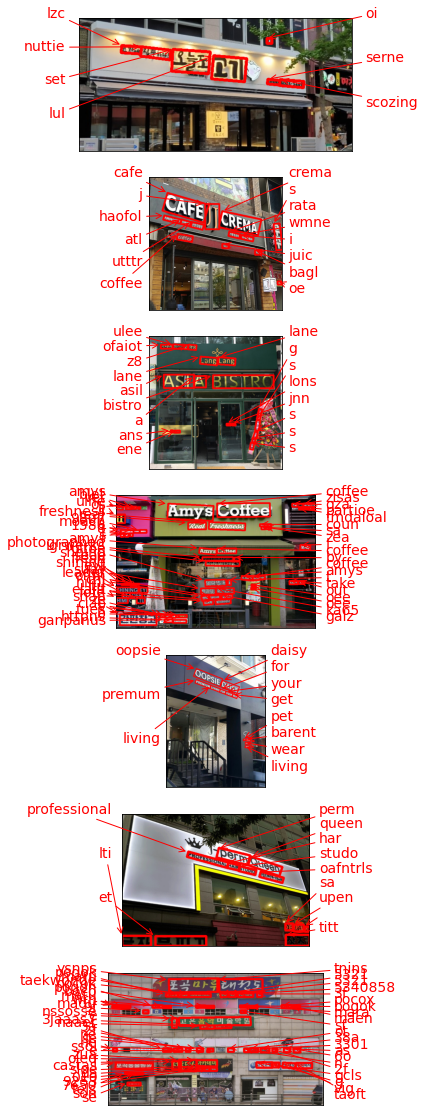

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2-3. 테서랙트로 테스트하기

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def crop_word_regions(image_path, output_path):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/E18_OCR/data'
output_dir = os.getenv('HOME')+'/aiffel/E18_OCR/output'
img_file_path = work_dir + '/6.JPG'   
cropped_image_path_list = crop_word_regions(img_file_path, output_dir)

/home/ssac18/aiffel/E18_OCR/output/0000.png
/home/ssac18/aiffel/E18_OCR/output/0001.png
/home/ssac18/aiffel/E18_OCR/output/0002.png
/home/ssac18/aiffel/E18_OCR/output/0003.png
/home/ssac18/aiffel/E18_OCR/output/0004.png
/home/ssac18/aiffel/E18_OCR/output/0005.png
/home/ssac18/aiffel/E18_OCR/output/0006.png
/home/ssac18/aiffel/E18_OCR/output/0007.png
/home/ssac18/aiffel/E18_OCR/output/0008.png
/home/ssac18/aiffel/E18_OCR/output/0009.png
/home/ssac18/aiffel/E18_OCR/output/0010.png
/home/ssac18/aiffel/E18_OCR/output/0011.png
/home/ssac18/aiffel/E18_OCR/output/0012.png
/home/ssac18/aiffel/E18_OCR/output/0013.png
/home/ssac18/aiffel/E18_OCR/output/0014.png
/home/ssac18/aiffel/E18_OCR/output/0015.png
/home/ssac18/aiffel/E18_OCR/output/0016.png


In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

recognize_images(cropped_image_path_list)

7 |

ees

at ikl

Se

Kisti

Of WON |S

AHO Ts

ore

a Institute

of

Science

and

Technolog

vy information

eel



Done


## [결론 및 회고]

